In [13]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
np.random.seed(286)

In [2]:
az.style.use("arviz-darkgrid")

# Chapter 4 - Inferences with Gaussians
## 4.1 Inferring a mean and standard deviation


Inferring the mean and variance of a Gaussian distribution. 
$$ \mu \sim \text{Gaussian}(0, .001)  $$
$$ \sigma \sim \text{Uniform} (0, 10)  $$
$$ x_{i} \sim \text{Gaussian} (\mu, \frac{1}{\sigma^2})  $$


In [6]:
# Data
x = np.array([1.1, 1.9, 2.3, 1.8])
n = len(x)

with pm.Model() as model1:
    # prior
    mu = pm.Normal("mu", mu=0., tau=0.001) # here tau is precision; if sigma is given, tau is no longer needed
    sigma = pm.Uniform("sigma", lower=0., upper=10.)
    # observed
    xi = pm.Normal("xi", mu=mu, tau=1 / (sigma ** 2), observed=x)
    # inference
    trace1 = pm.sample(2000, tune=2000, target_accept=0.9)

# idata1 = az.from_pymc3(trace1)
az.summary(trace1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


/opt/anaconda3/envs/mcmc/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 30 seconds.
There were 17 divergences after tuning. Increase `target_accept` or reparameterize.


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu     1.805  0.707   0.518    2.923      0.029    0.020     848.0     697.0   
sigma  1.029  0.946   0.241    2.464      0.033    0.023    1108.0    1063.0   

       r_hat  
mu      1.01  
sigma   1.00

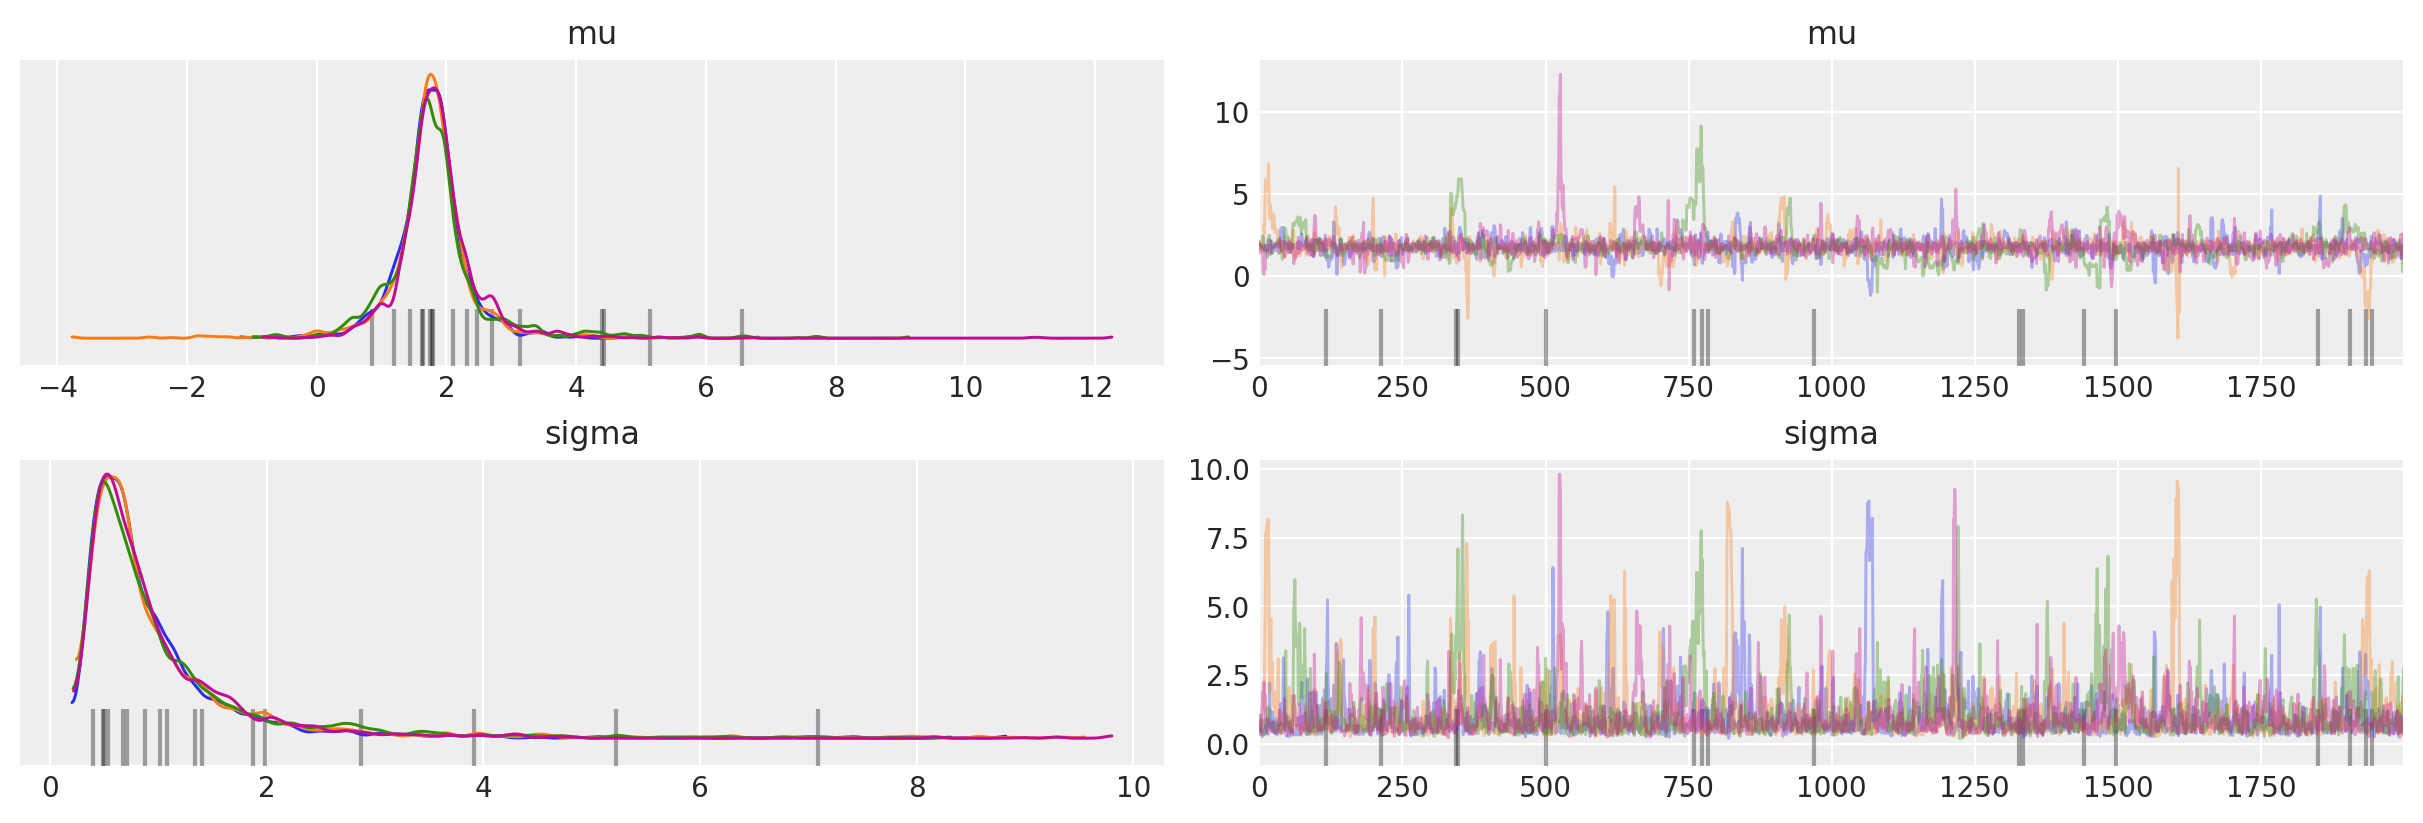

In [7]:
az.plot_trace(trace1, compact=False);

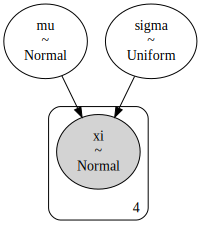

In [12]:
pm.model_to_graphviz(model1)

array([[<Axes: >, None],
       [<Axes: xlabel='mu', ylabel='sigma'>, <Axes: >]], dtype=object)

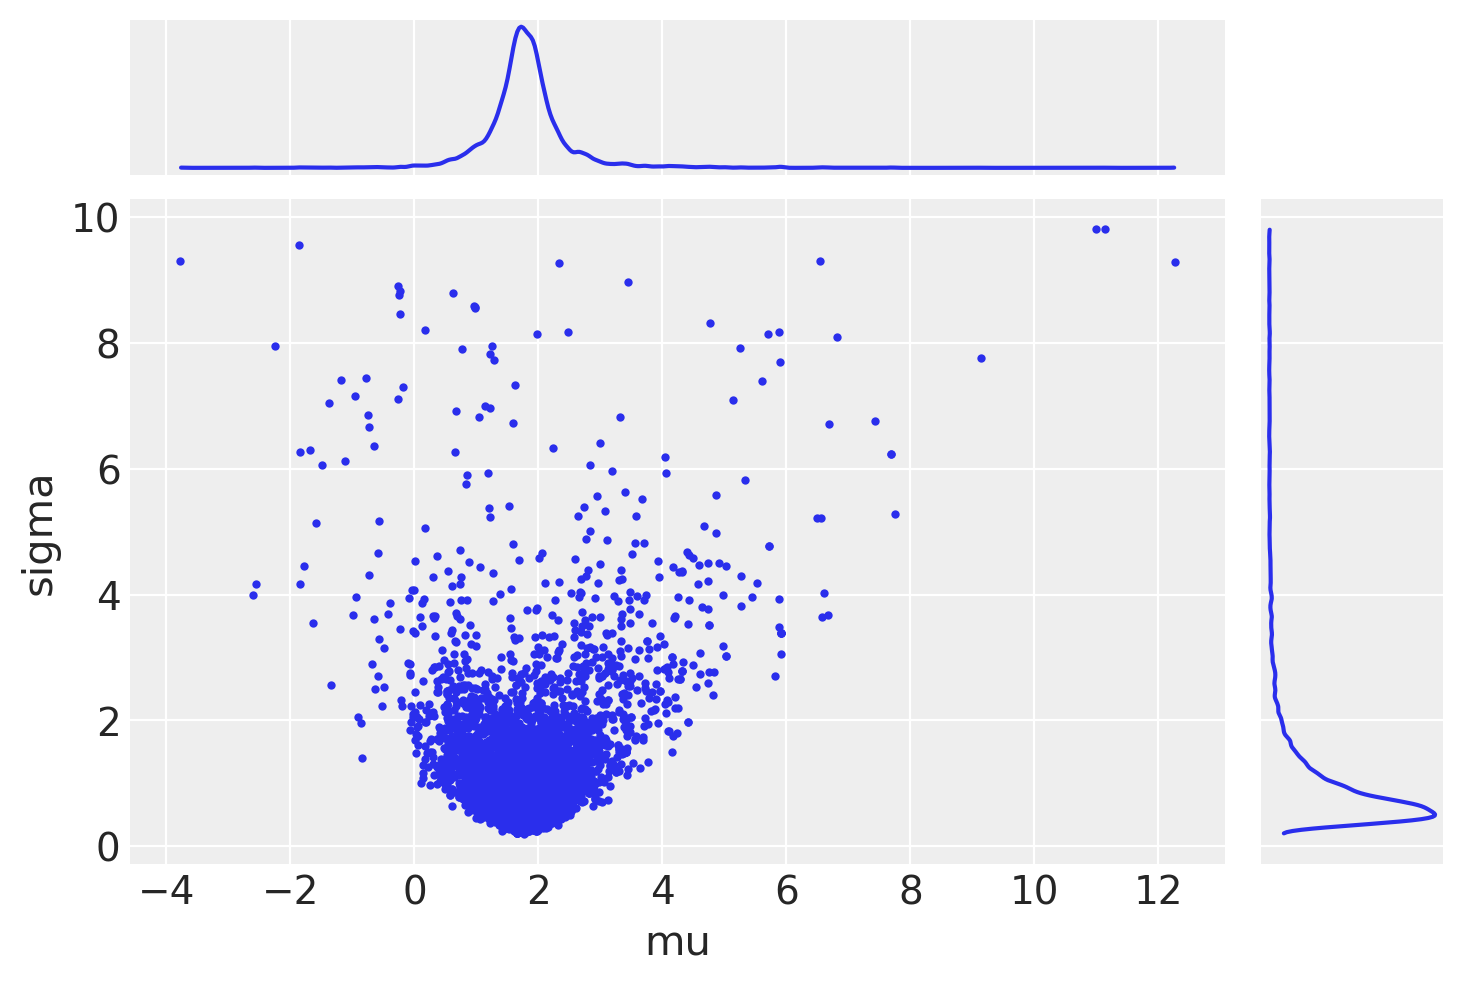

In [21]:
# az.plot_joint(trace1, joint_kwargs={"alpha": 0.2}); 
# this will return an error, maybe because "plot_joint" is now deprecated

# this is the new way to plot joint distribution
az.plot_pair(trace1, marginals=True, kind='scatter')

/opt/anaconda3/envs/mcmc/lib/python3.12/site-packages/seaborn/axisgrid.py:1766: UserWarning: The figure layout has changed to tight
  f.tight_layout()


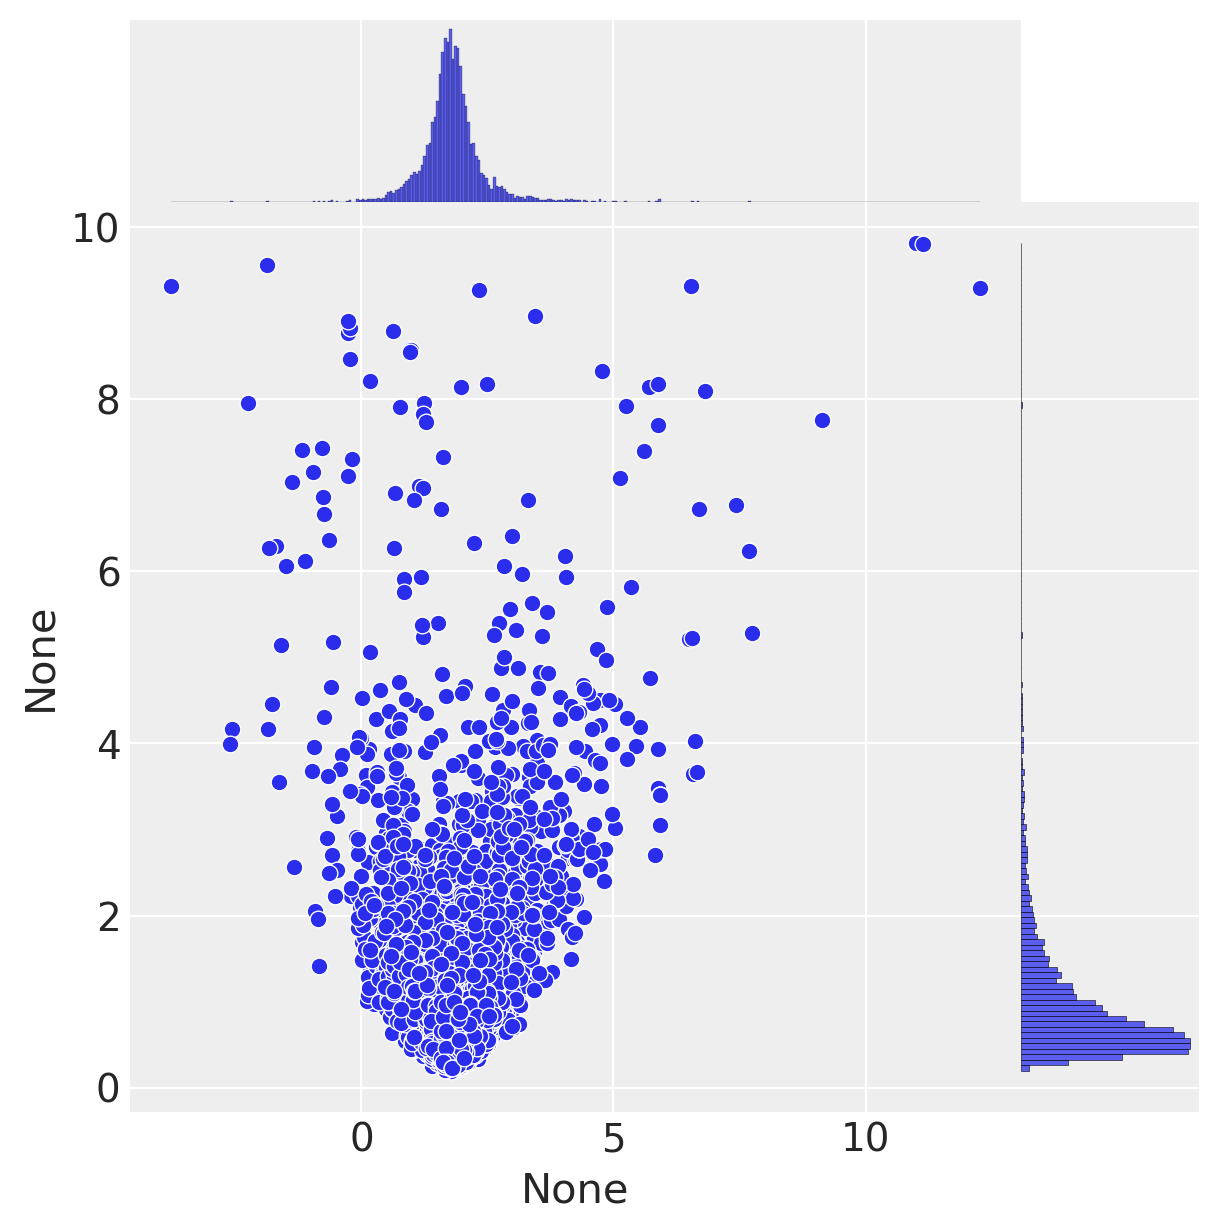

In [17]:
# another way is using seaborn:
# But the code below is leaving out many details; 
#   not recommended compared to az.plot_pair

sns.jointplot(x=trace1.posterior["mu"].to_numpy().flatten(),
              y=trace1.posterior["sigma"].to_numpy().flatten(),
              kind="scatter", space=0, color="C0");

### Note from Junpeng Lao
There might be divergence warning (Uniform prior on sigma is not a good idea in general), which you can further visualize below:

/opt/anaconda3/envs/mcmc/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


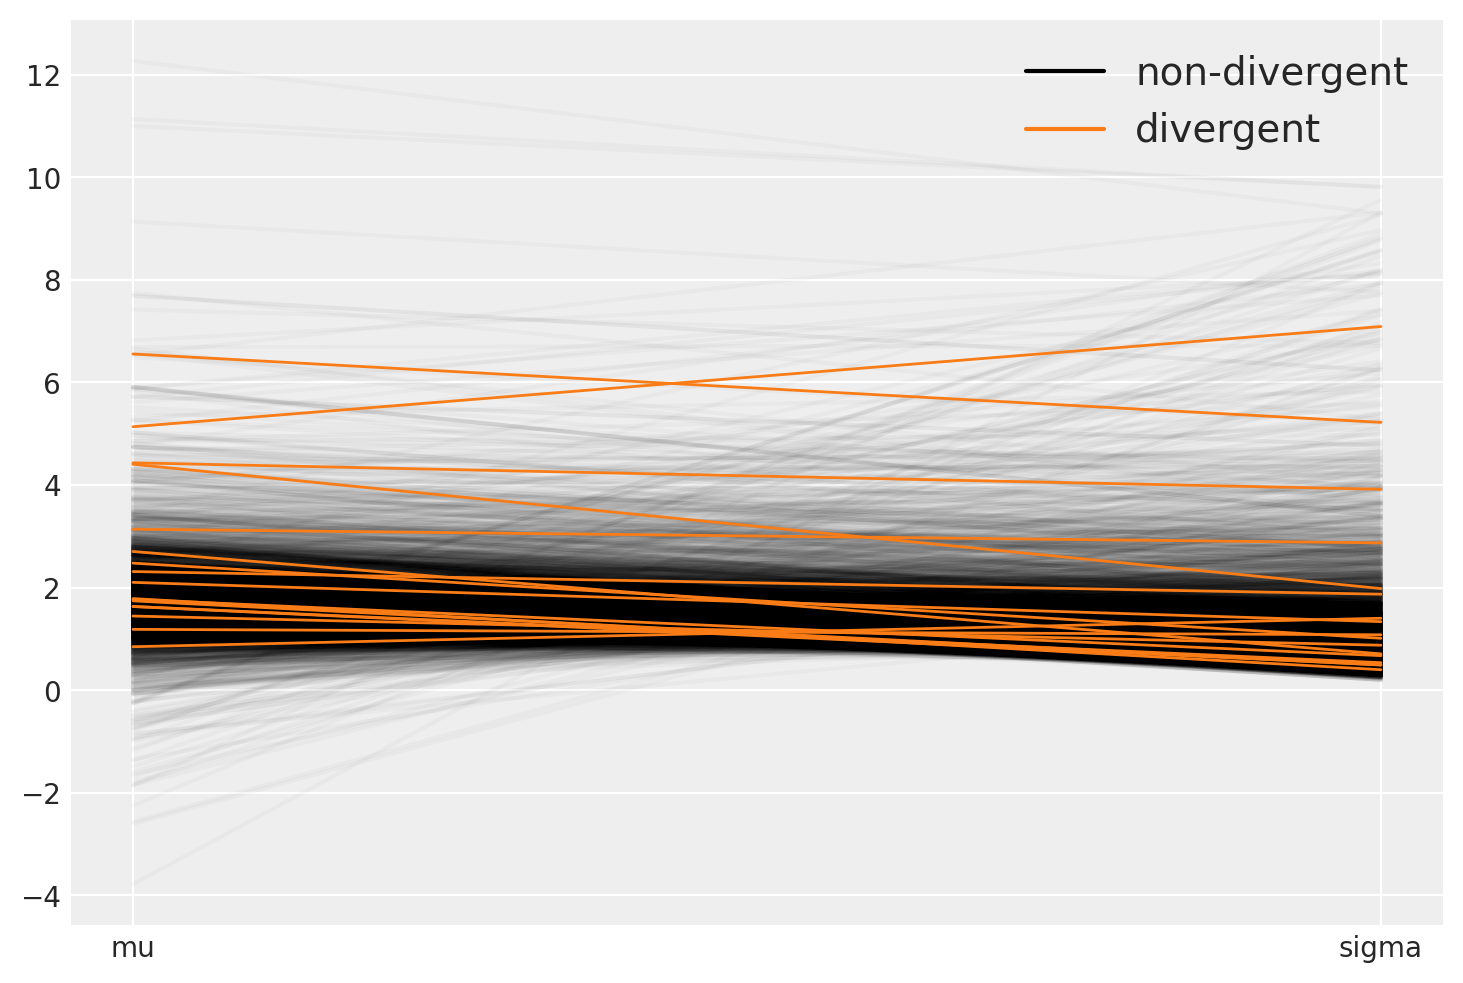

In [22]:
az.plot_parallel(trace1);

### Exercises

#### Exercise 4.1.1

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


/opt/anaconda3/envs/mcmc/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 30 seconds.


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu     4.006  0.509   3.037    4.930      0.007    0.005    5880.0    4972.0   
sigma  2.296  0.403   1.631    3.067      0.006    0.004    5041.0    4263.0   

       r_hat  
mu       1.0  
sigma    1.0

array([[<Axes: >, None],
       [<Axes: xlabel='mu', ylabel='sigma'>, <Axes: >]], dtype=object)

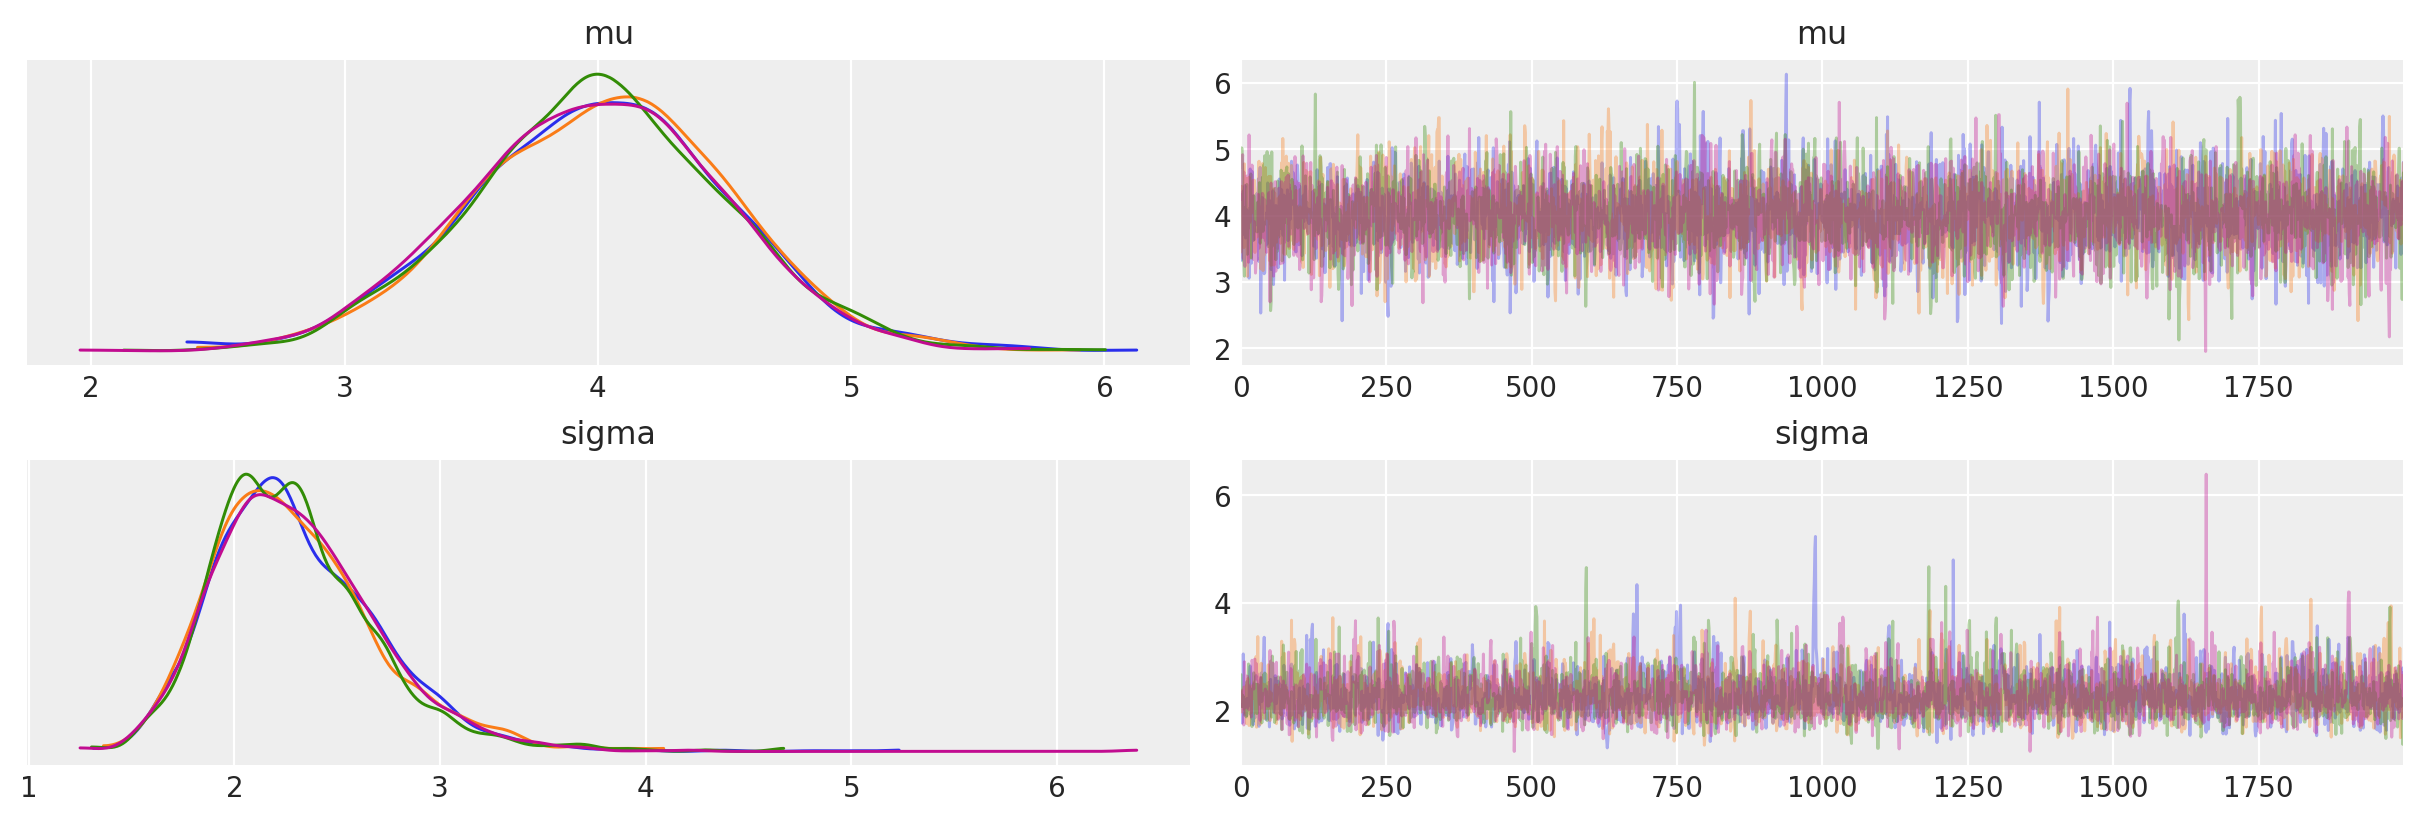

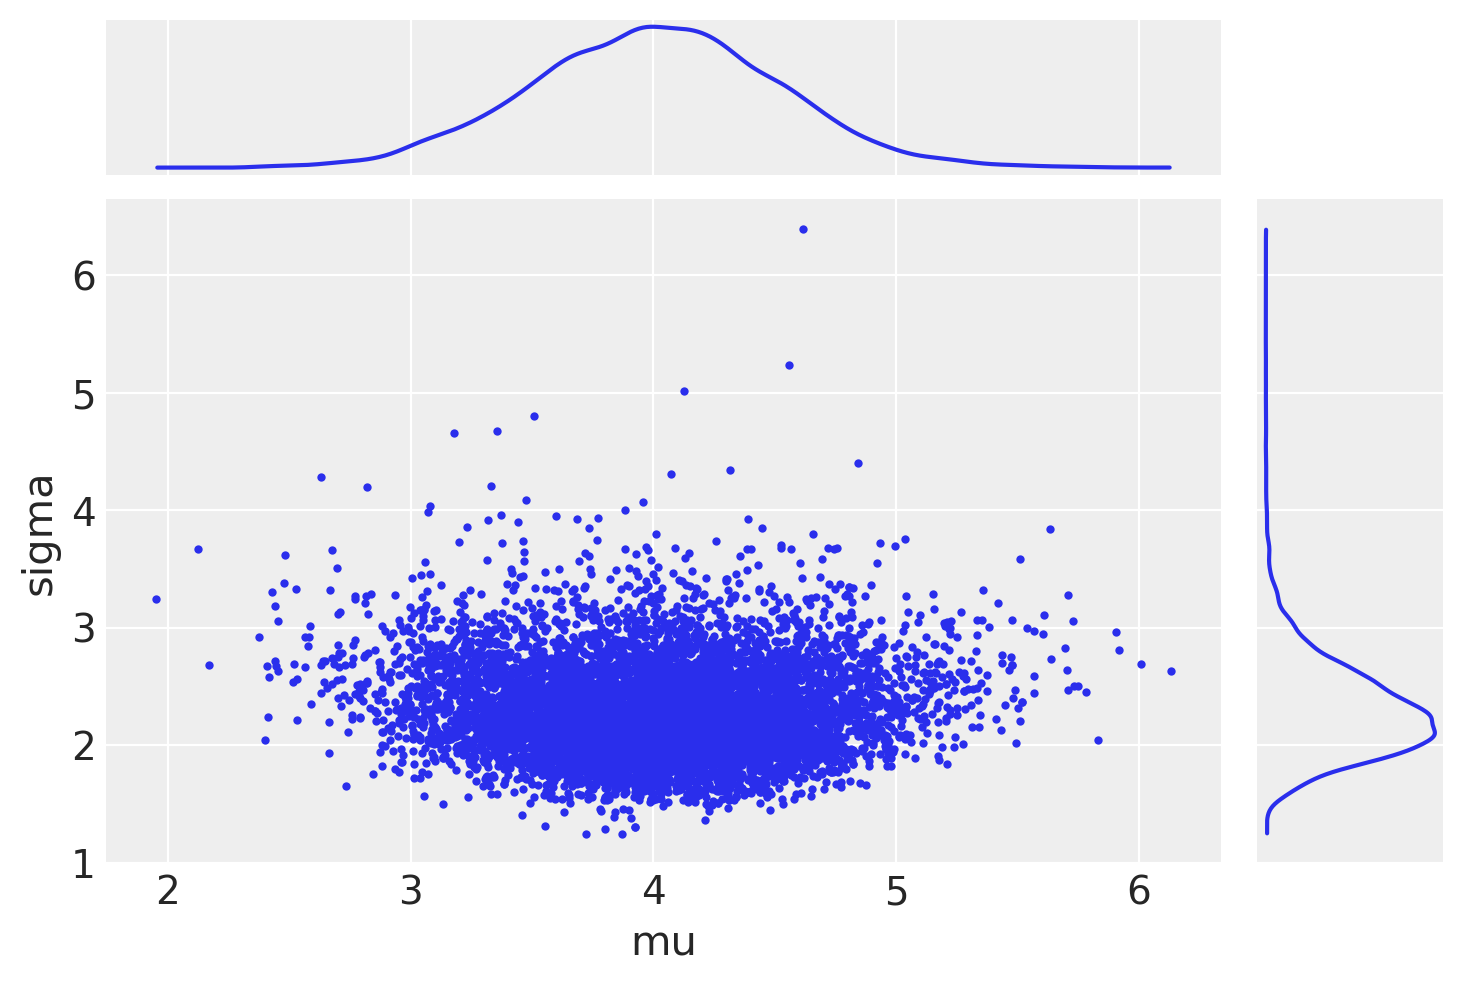

In [27]:
x = np.array([1.1, 1.9, 2.3, 1.8,
              2.2, 2.8, 3.1, 2.7,
                3.0, 3.5, 3.9, 3.6,
                3.8, 4.3, 4.7, 4.4,
                7.1, 7.9, 8.3, 7.8])
n = len(x)

with pm.Model() as model1_1:
    # prior
    mu = pm.Normal("mu", mu=0., tau=0.001) # here tau is precision; if sigma is given, tau is no longer needed
    sigma = pm.Uniform("sigma", lower=0., upper=10.)
    # observed
    xi = pm.Normal("xi", mu=mu, tau=1 / (sigma ** 2), observed=x)
    # inference
    trace1_1 = pm.sample(2000, tune=2000, target_accept=0.9)
    
display(az.summary(trace1_1))

az.plot_trace(trace1_1, compact=False);

az.plot_pair(trace1_1, marginals=True, kind='scatter')
                

In [28]:
x.mean(), x.std() 
# so the expectation of estimated mean and std is close to those computed from the samples

(4.01, 2.0937764923697086)

In [30]:
display(az.summary(trace1_1))

# in the example given in the book, the sd of mu and sigma are ~0.71 and ~0.95, respectively
# In this example, we change x to more samples (although they are more diverse), 
#   the sd of mu and sigma get smaller

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu     4.006  0.509   3.037    4.930      0.007    0.005    5880.0    4972.0   
sigma  2.296  0.403   1.631    3.067      0.006    0.004    5041.0    4263.0   

       r_hat  
mu       1.0  
sigma    1.0

#### Exercise 4.1.2

This is already plotted in the main chapeter. 

We can see that, when sigma is small, mu is also very concentrated. When sigma is large, mu is more spread out.

#### Exercise 4.1.3

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


/opt/anaconda3/envs/mcmc/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 26 seconds.


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu  1.778  0.493   0.833     2.68      0.009    0.006    2941.0    4469.0   

    r_hat  
mu    1.0

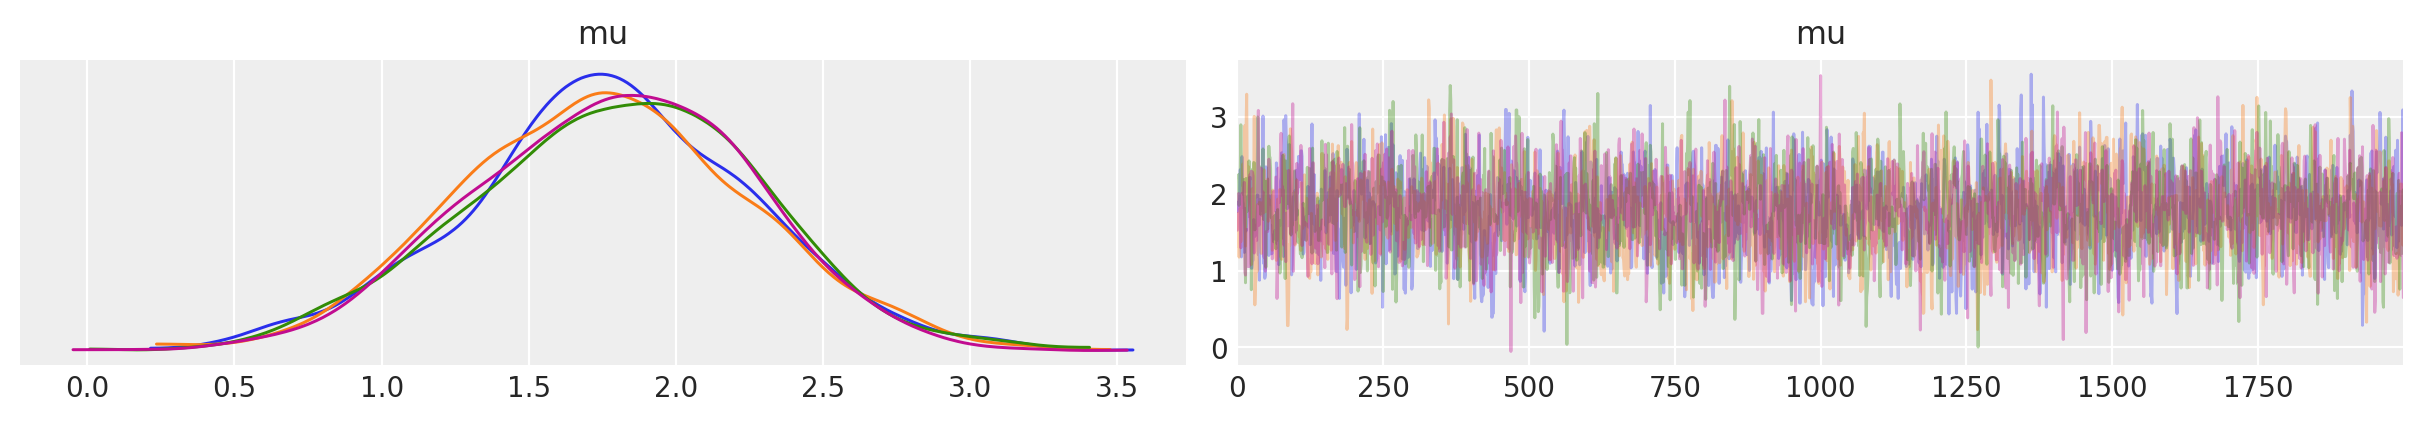

In [33]:
x = np.array([1.1, 1.9, 2.3, 1.8])
n = len(x)

with pm.Model() as model1_3:
    # prior
    mu = pm.Normal("mu", mu=0., tau=0.001)
    sigma = 1
    # observed
    xi = pm.Normal("xi", mu=mu, tau=1 / (sigma ** 2), observed=x)
    # inference
    trace1_3 = pm.sample(2000, tune=2000, target_accept=0.9)
    
az.plot_trace(trace1_3, compact=False);

az.summary(trace1_3)

In [36]:
x.mean(), x.std()
# although x's std is not 1, 
#   the estimated mu is close to the sample mean

(1.775, 0.4322904116447645)

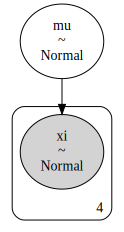

In [37]:
pm.model_to_graphviz(model1_3)

#### Exercise 4.1.4

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma]


/opt/anaconda3/envs/mcmc/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 26 seconds.


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sigma  0.704  0.478    0.23    1.443      0.012     0.01    1996.0    2321.0   

       r_hat  
sigma    1.0

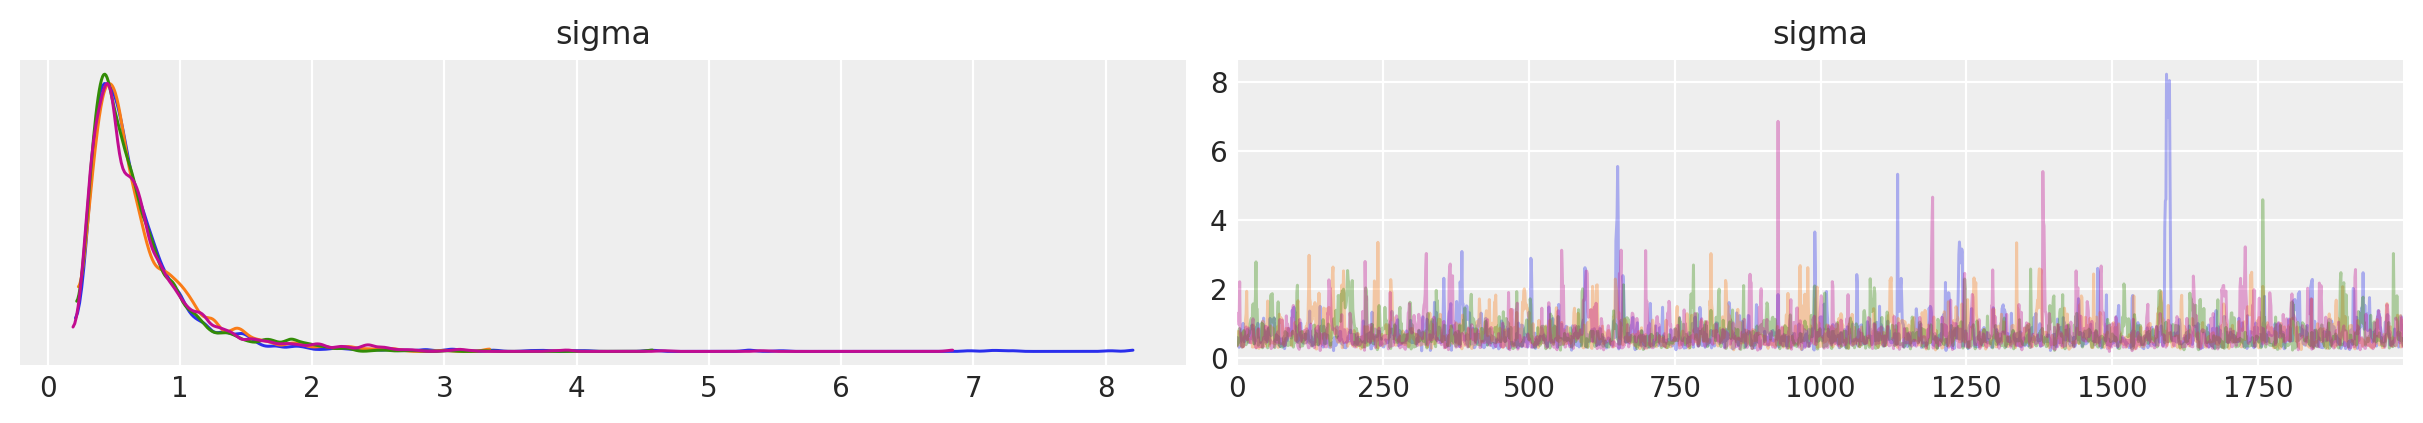

In [40]:
x = np.array([1.1, 1.9, 2.3, 1.8]) # x.mean() = 1.775
n = len(x)

with pm.Model() as model1_4:
    # prior
    mu = 1.7
    sigma = pm.Uniform("sigma", lower=0., upper=10.)
    # observed
    xi = pm.Normal("xi", mu=mu, tau=1 / (sigma ** 2), observed=x)
    # inference
    trace1_4 = pm.sample(2000, tune=2000, target_accept=0.9)
    
az.plot_trace(trace1_4, compact=False);

display(az.summary(trace1_4))

In [45]:
x.mean(), x.std()

(1.775, 0.4322904116447645)

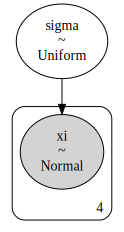

In [41]:
pm.model_to_graphviz(model1_4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma]


/opt/anaconda3/envs/mcmc/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 29 seconds.


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sigma  0.706  0.473   0.219     1.42      0.012    0.009    1880.0    1555.0   

       r_hat  
sigma    1.0

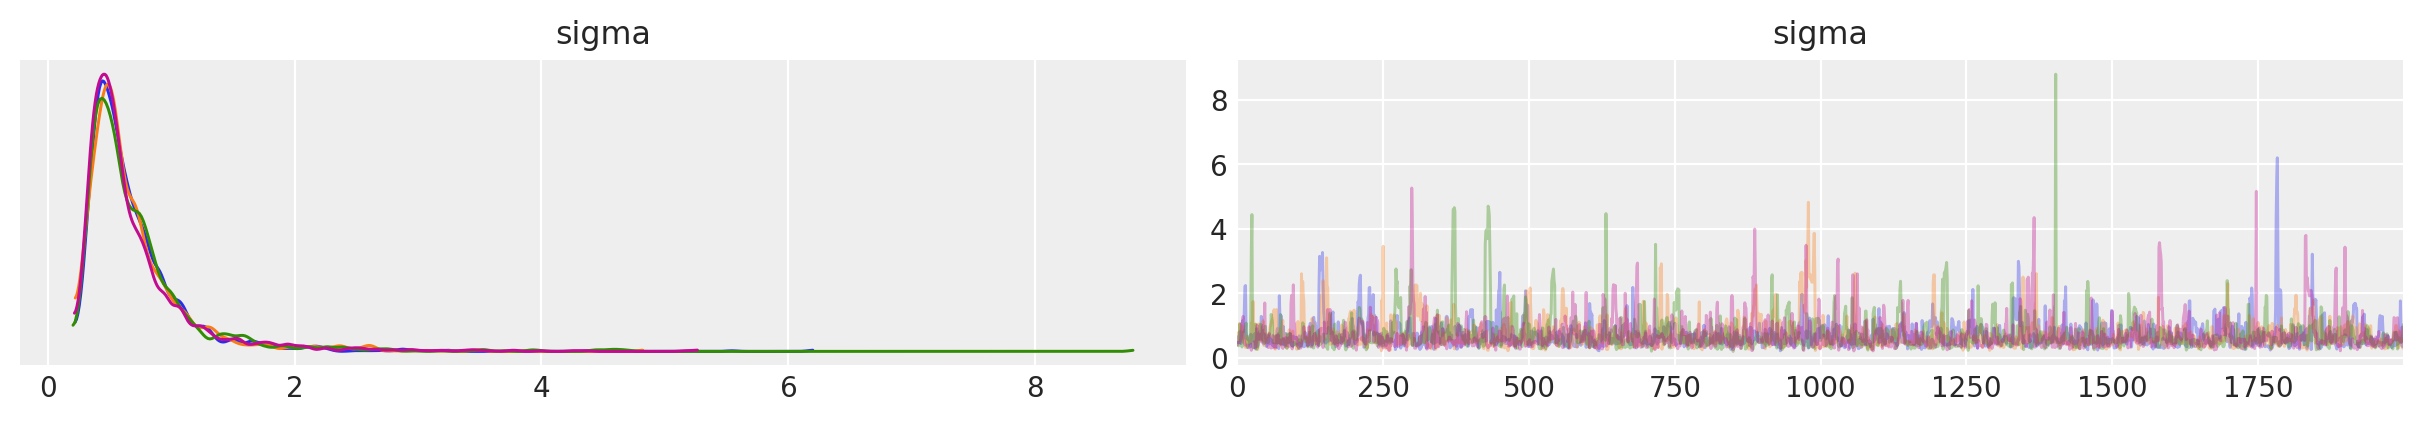

In [51]:
x = np.array([1.1, 1.9, 2.3, 1.8]) # x.mean() = 1.775
n = len(x)

with pm.Model() as model1_4:
    # prior
    mu = 1.7
    sigma = pm.Uniform("sigma", lower=0., upper=10.) # posterior sigma mean is around 0.706
    #### try other priors
    # sigma = pm.Uniform("sigma", lower=0., upper=2.) # posterior sigma mean is around 0.6
    # sigma = pm.Uniform("sigma", lower=0., upper=1.) # posterior sigma mean is around 0.554
    # sigma = pm.HalfNormal("sigma", sigma=10.) # posterior sigma mean is around 0.712
    #### so, differnet priors will lead to different results
    
    # observed
    xi = pm.Normal("xi", mu=mu, tau=1 / (sigma ** 2), observed=x)
    # inference
    trace1_4 = pm.sample(2000, tune=2000, target_accept=0.9)
    
az.plot_trace(trace1_4, compact=False);

display(az.summary(trace1_4))

Using the prior distribution Uniform(0, 10) for $\sigma$ is not a good idea, for the above dataset (4 data points), and different priors for $\sigma$ lead to very different results (eg. mean of the posterior distribution of $\sigma$).

But besides the choice of prior, the data size also matters. When we replicate the data more times (so sample mean and sd keep unchanged), the posterior distribution of $\sigma$ will be more concentrated, and closer to sample sd (which is more intuitive). 

See the code below:

1.775 0.43229041164476445


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma]


/opt/anaconda3/envs/mcmc/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 31 seconds.


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sigma  0.452  0.052    0.36    0.549      0.001    0.001    2832.0    3895.0   

       r_hat  
sigma    1.0

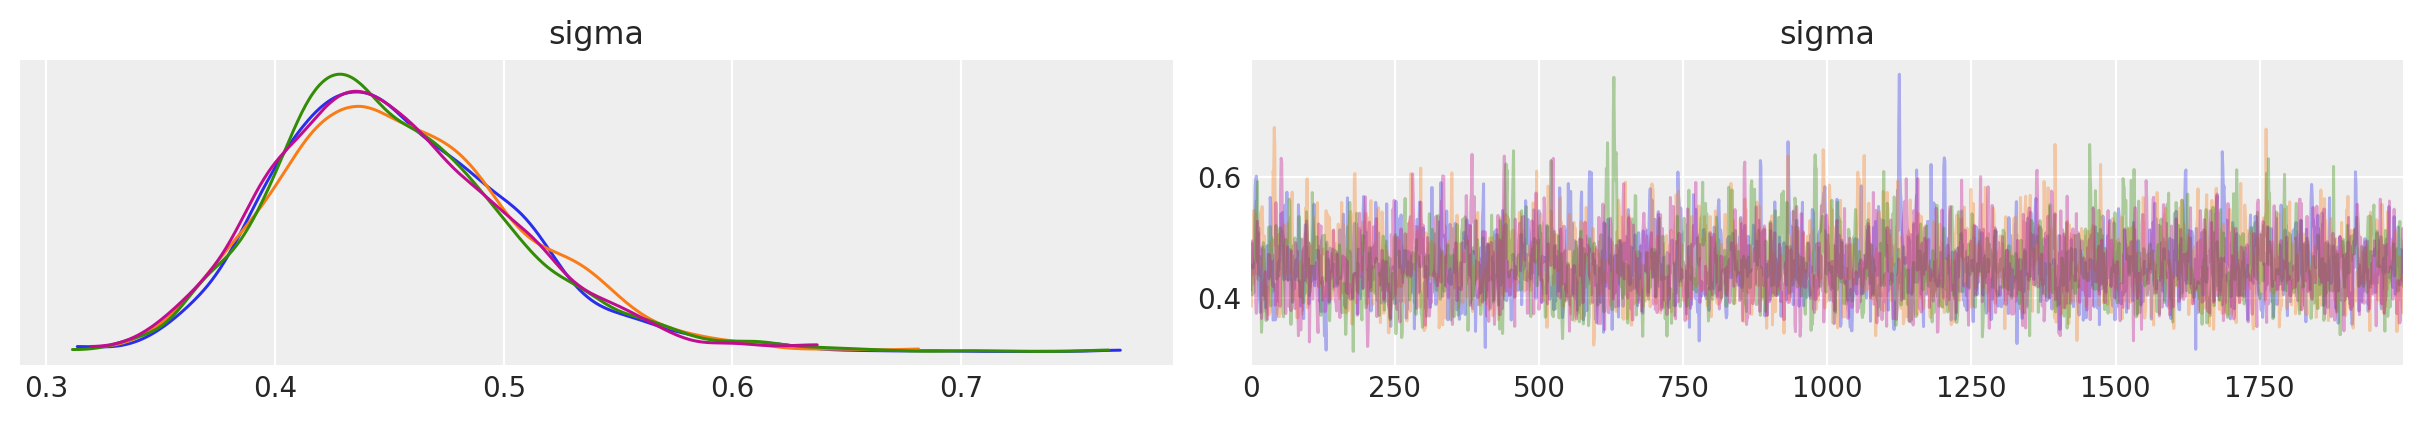

In [52]:
x = np.array([1.1, 1.9, 2.3, 1.8]*10) # x.mean() = 1.775
print(x.mean(), x.std())
n = len(x)

with pm.Model() as model1_4:
    # prior
    mu = 1.7
    sigma = pm.Uniform("sigma", lower=0., upper=10.) # posterior sigma mean is around 0.706
    # observed
    xi = pm.Normal("xi", mu=mu, tau=1 / (sigma ** 2), observed=x)
    # inference
    trace1_4 = pm.sample(2000, tune=2000, target_accept=0.9)
    
az.plot_trace(trace1_4, compact=False);

display(az.summary(trace1_4))

## 4.2 The seven scientists


The model:
$$ \mu \sim \text{Gaussian}(0, .001)  $$
$$ \lambda_{i} \sim \text{Gamma} (.001, .001)  $$
$$ \sigma = 1/{\sqrt\lambda_{i}} $$  
$$ x_{i} \sim \text{Gaussian} (\mu, \lambda_{i})  $$

The mean is the same for all seven scientists, while the standard deviations are different 

In [77]:
# data
x = np.array([-27.020, 3.570, 8.191, 9.898, 9.603, 9.945, 10.056])
n = len(x)

with pm.Model() as model2:
    # prior
    mu = pm.Normal("mu", mu=0., tau=0.001)
    lambda1 = pm.Gamma("lambda1", alpha=0.01, beta=0.01, shape=n)
    sigma = pm.Deterministic('sigma',1 / np.sqrt(lambda1))
    # observed
    xi = pm.Normal("xi", mu=mu, tau=lambda1, observed=x)

    # inference
    trace2 = pm.sample(2000, tune=2000, target_accept=0.9)

az.summary(trace2, stat_funcs={"median": np.median})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, lambda1]


/opt/anaconda3/envs/mcmc/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 45 seconds.


mean        sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
mu            9.868     0.205   9.474   10.201      0.004    0.003    3173.0   
lambda1[0]    0.001     0.001   0.000    0.003      0.000    0.000    3498.0   
lambda1[1]    0.027     0.038   0.000    0.095      0.000    0.000    3881.0   
lambda1[2]    0.387     0.641   0.000    1.305      0.008    0.006    3985.0   
lambda1[3]   30.788    49.765   0.000  115.667      0.619    0.437    3270.0   
lambda1[4]   14.595    27.961   0.000   56.945      0.352    0.249    4287.0   
lambda1[5]   30.196    50.357   0.000  116.015      0.628    0.457    3625.0   
lambda1[6]   23.955    42.514   0.000   94.824      0.535    0.378    3600.0   
sigma[0]    202.175  1425.803  10.488  409.400     31.754   22.456    3498.0   
sigma[1]     55.959  1174.039   1.688   72.765     23.404   16.551    3881.0   
sigma[2]      8.249    48.987   0.396   19.504      0.719    0.509    3985.0   
sigma[3]      1.237     9.227   0.047    2.778      0.155    0.110    3270.0   
sigma[4]      1.805    14.244   0.053    3.810      0.207    0.146    4287.0   
sigma[5]      1.183    10.770   0.041    2.541      0.162    0.115    3625.0   
sigma[6]      2.863    57.883   0.043    3.291      1.040    0.735    3600.0   

            ess_tail  r_hat  median  
mu            2788.0    1.0   9.894  
lambda1[0]    1891.0    1.0   0.000  
lambda1[1]    2530.0    1.0   0.012  
lambda1[2]    3200.0    1.0   0.177  
lambda1[3]    2766.0    1.0  11.179  
lambda1[4]    3271.0    1.0   4.712  
lambda1[5]    3366.0    1.0  10.268  
lambda1[6]    2955.0    1.0   7.652  
sigma[0]      1891.0    1.0  53.125  
sigma[1]      2530.0    1.0   9.085  
sigma[2]      3200.0    1.0   2.376  
sigma[3]      2766.0    1.0   0.299  
sigma[4]      3271.0    1.0   0.461  
sigma[5]      3366.0    1.0   0.312  
sigma[6]      2955.0    1.0   0.362

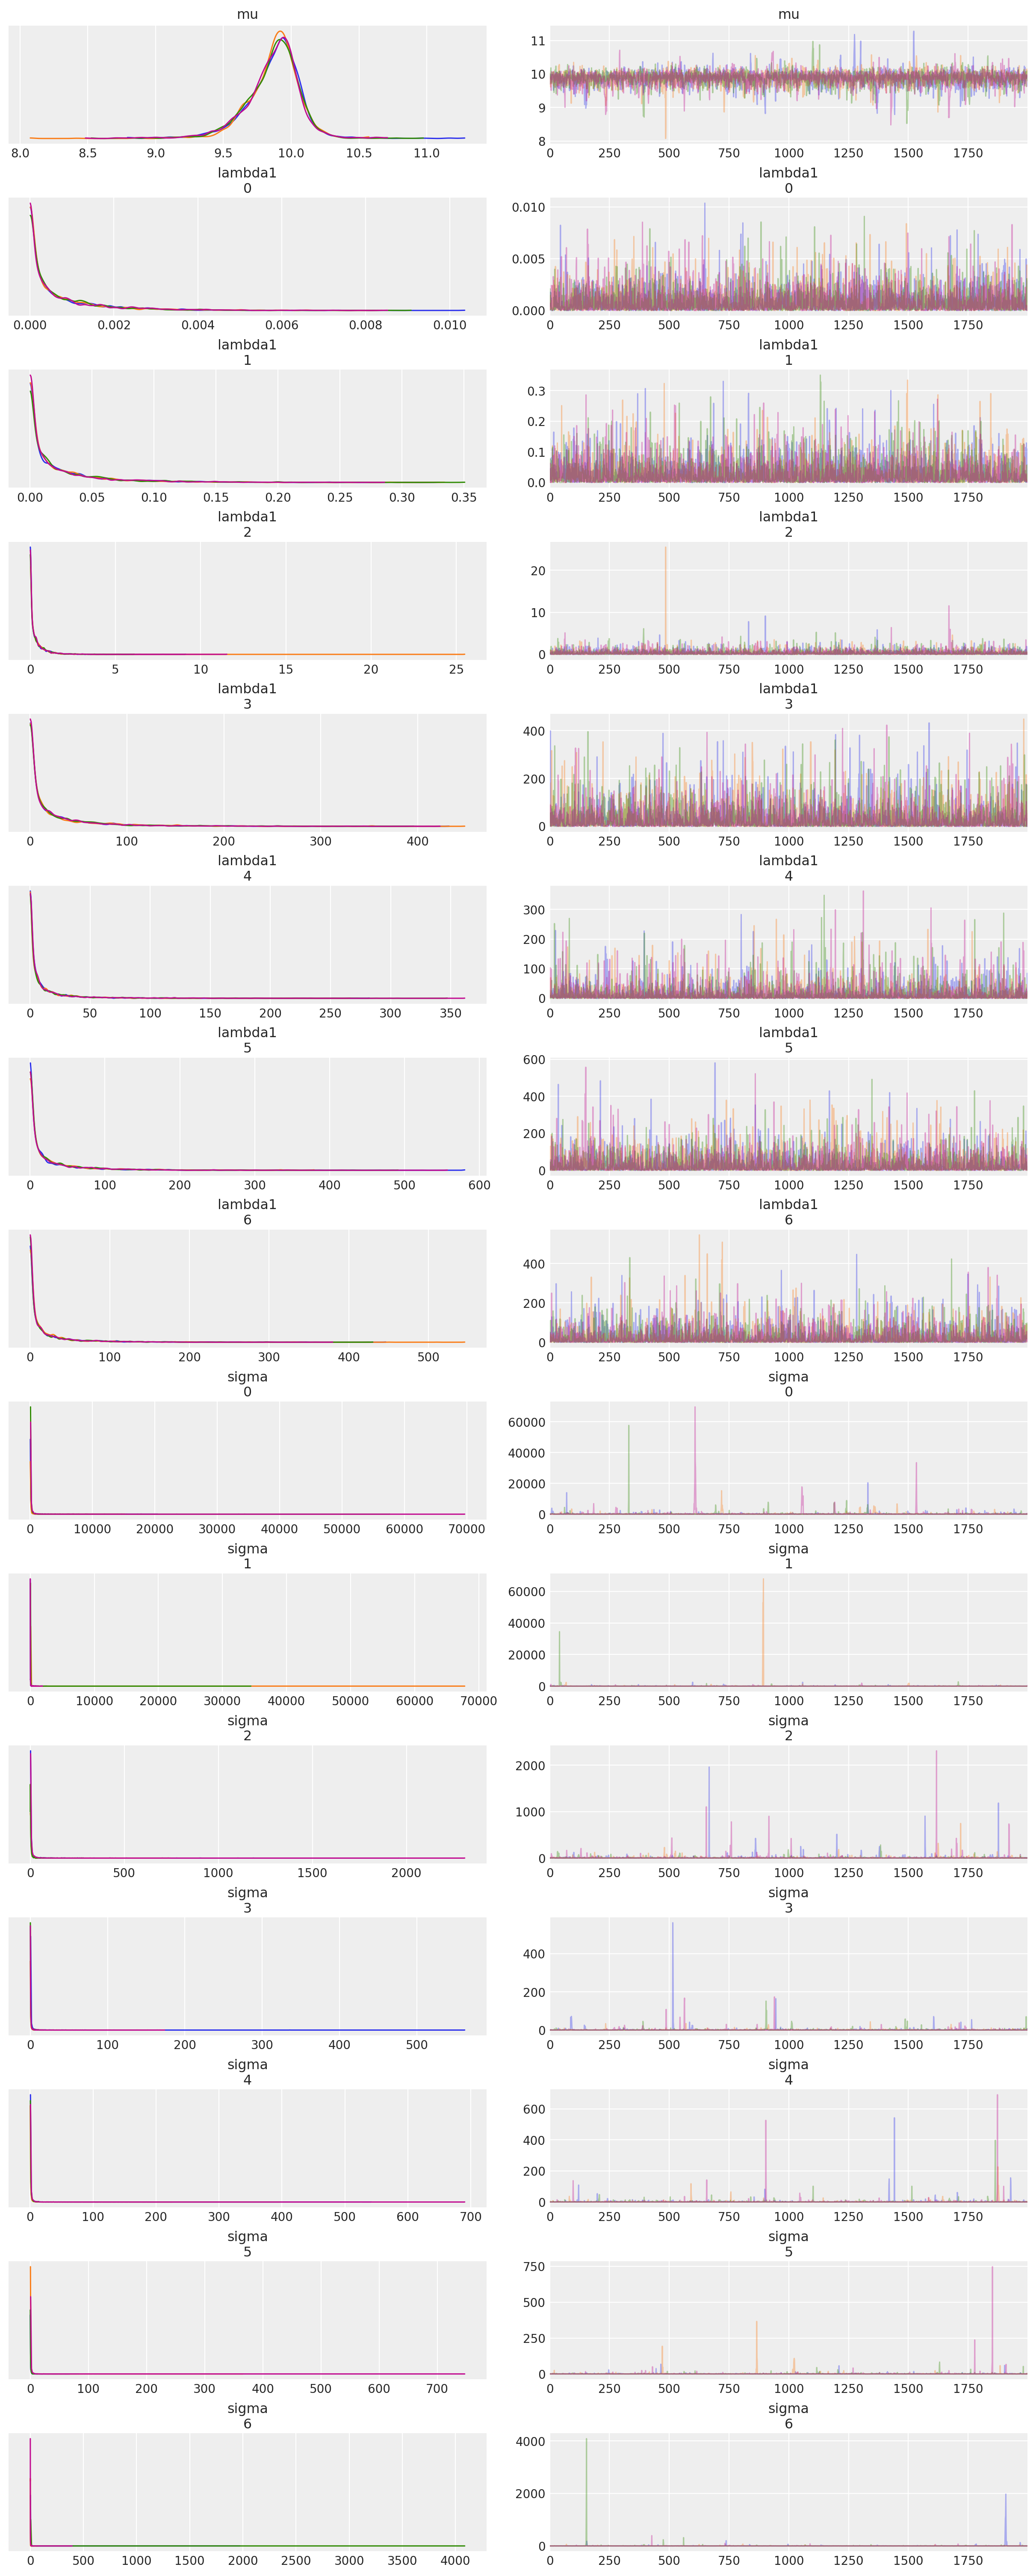

In [78]:
az.plot_trace(trace2, compact=False);

### Exercises

#### Exercise 4.2.1

In [79]:
az.summary(trace2, stat_funcs={"median": np.median})

mean        sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
mu            9.868     0.205   9.474   10.201      0.004    0.003    3173.0   
lambda1[0]    0.001     0.001   0.000    0.003      0.000    0.000    3498.0   
lambda1[1]    0.027     0.038   0.000    0.095      0.000    0.000    3881.0   
lambda1[2]    0.387     0.641   0.000    1.305      0.008    0.006    3985.0   
lambda1[3]   30.788    49.765   0.000  115.667      0.619    0.437    3270.0   
lambda1[4]   14.595    27.961   0.000   56.945      0.352    0.249    4287.0   
lambda1[5]   30.196    50.357   0.000  116.015      0.628    0.457    3625.0   
lambda1[6]   23.955    42.514   0.000   94.824      0.535    0.378    3600.0   
sigma[0]    202.175  1425.803  10.488  409.400     31.754   22.456    3498.0   
sigma[1]     55.959  1174.039   1.688   72.765     23.404   16.551    3881.0   
sigma[2]      8.249    48.987   0.396   19.504      0.719    0.509    3985.0   
sigma[3]      1.237     9.227   0.047    2.778      0.155    0.110    3270.0   
sigma[4]      1.805    14.244   0.053    3.810      0.207    0.146    4287.0   
sigma[5]      1.183    10.770   0.041    2.541      0.162    0.115    3625.0   
sigma[6]      2.863    57.883   0.043    3.291      1.040    0.735    3600.0   

            ess_tail  r_hat  median  
mu            2788.0    1.0   9.894  
lambda1[0]    1891.0    1.0   0.000  
lambda1[1]    2530.0    1.0   0.012  
lambda1[2]    3200.0    1.0   0.177  
lambda1[3]    2766.0    1.0  11.179  
lambda1[4]    3271.0    1.0   4.712  
lambda1[5]    3366.0    1.0  10.268  
lambda1[6]    2955.0    1.0   7.652  
sigma[0]      1891.0    1.0  53.125  
sigma[1]      2530.0    1.0   9.085  
sigma[2]      3200.0    1.0   2.376  
sigma[3]      2766.0    1.0   0.299  
sigma[4]      3271.0    1.0   0.461  
sigma[5]      3366.0    1.0   0.312  
sigma[6]      2955.0    1.0   0.362

~~lambda[0], lambda[1] mean very small, so their measurements are very inaccurate.~~

~~lambda[2] mean is around 0.652; corresponding sd is about (1/0.652)**0.5 = 1.238; so it is relatively accurate.~~

~~The rest have very high lambda mean; so sd very small; the most accurate ones.~~

    The posterior distributions for most standard deviations are very skewed. As a result, the posterior mean will be dominated by relatively low proportion of extreme values. For this reason, it is more informative to look at the posterior median. As expected, the ﬁrst two scientists are pretty inept measurers and have high estimates of sigma. The third scientist does better than the ﬁrst two, but also appears more inept than the remaining four.

#### Exercise 4.2.2

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


/opt/anaconda3/envs/mcmc/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 49 seconds.
There were 444 divergences after tuning. Increase `target_accept` or reparameterize.


mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
mu           8.485   4.085   0.503   15.680      0.125    0.088    1558.0   
sigma[0]    54.826  23.373  19.050   97.021      0.506    0.390    2346.0   
sigma[1]    30.509  25.911   0.119   82.875      0.534    0.377    2241.0   
sigma[2]    25.252  26.169   0.137   80.620      0.575    0.406    2018.0   
sigma[3]    23.843  26.097   0.100   79.535      0.584    0.432    1200.0   
sigma[4]    23.211  25.478   0.108   77.410      0.578    0.408    1392.0   
sigma[5]    23.255  25.704   0.138   78.296      0.535    0.379     663.0   
sigma[6]    25.033  26.227   0.100   79.067      0.637    0.450    1612.0   
lambda1[0]   0.001   0.001   0.000    0.002      0.000    0.000    2346.0   
lambda1[1]   0.189   2.775   0.000    0.093      0.097    0.070    2241.0   
lambda1[2]   0.427   3.086   0.000    0.780      0.119    0.089    2018.0   
lambda1[3]   0.877   5.219   0.000    2.145      0.240    0.170    1200.0   
lambda1[4]   0.687   3.794   0.000    1.819      0.137    0.098    1392.0   
lambda1[5]   1.200   5.202   0.000    3.346      0.433    0.307     663.0   
lambda1[6]   0.639   4.467   0.000    1.350      0.153    0.118    1612.0   

            ess_tail  r_hat  median  
mu            1302.0    1.0   9.317  
sigma[0]      1596.0    1.0  52.382  
sigma[1]      2455.0    1.0  21.801  
sigma[2]      2705.0    1.0  14.478  
sigma[3]       982.0    1.0  13.126  
sigma[4]      1518.0    1.0  12.474  
sigma[5]       226.0    1.0  12.434  
sigma[6]      2603.0    1.0  14.419  
lambda1[0]    1596.0    1.0   0.000  
lambda1[1]    2455.0    1.0   0.002  
lambda1[2]    2705.0    1.0   0.005  
lambda1[3]     982.0    1.0   0.006  
lambda1[4]    1518.0    1.0   0.006  
lambda1[5]     226.0    1.0   0.006  
lambda1[6]    2603.0    1.0   0.005

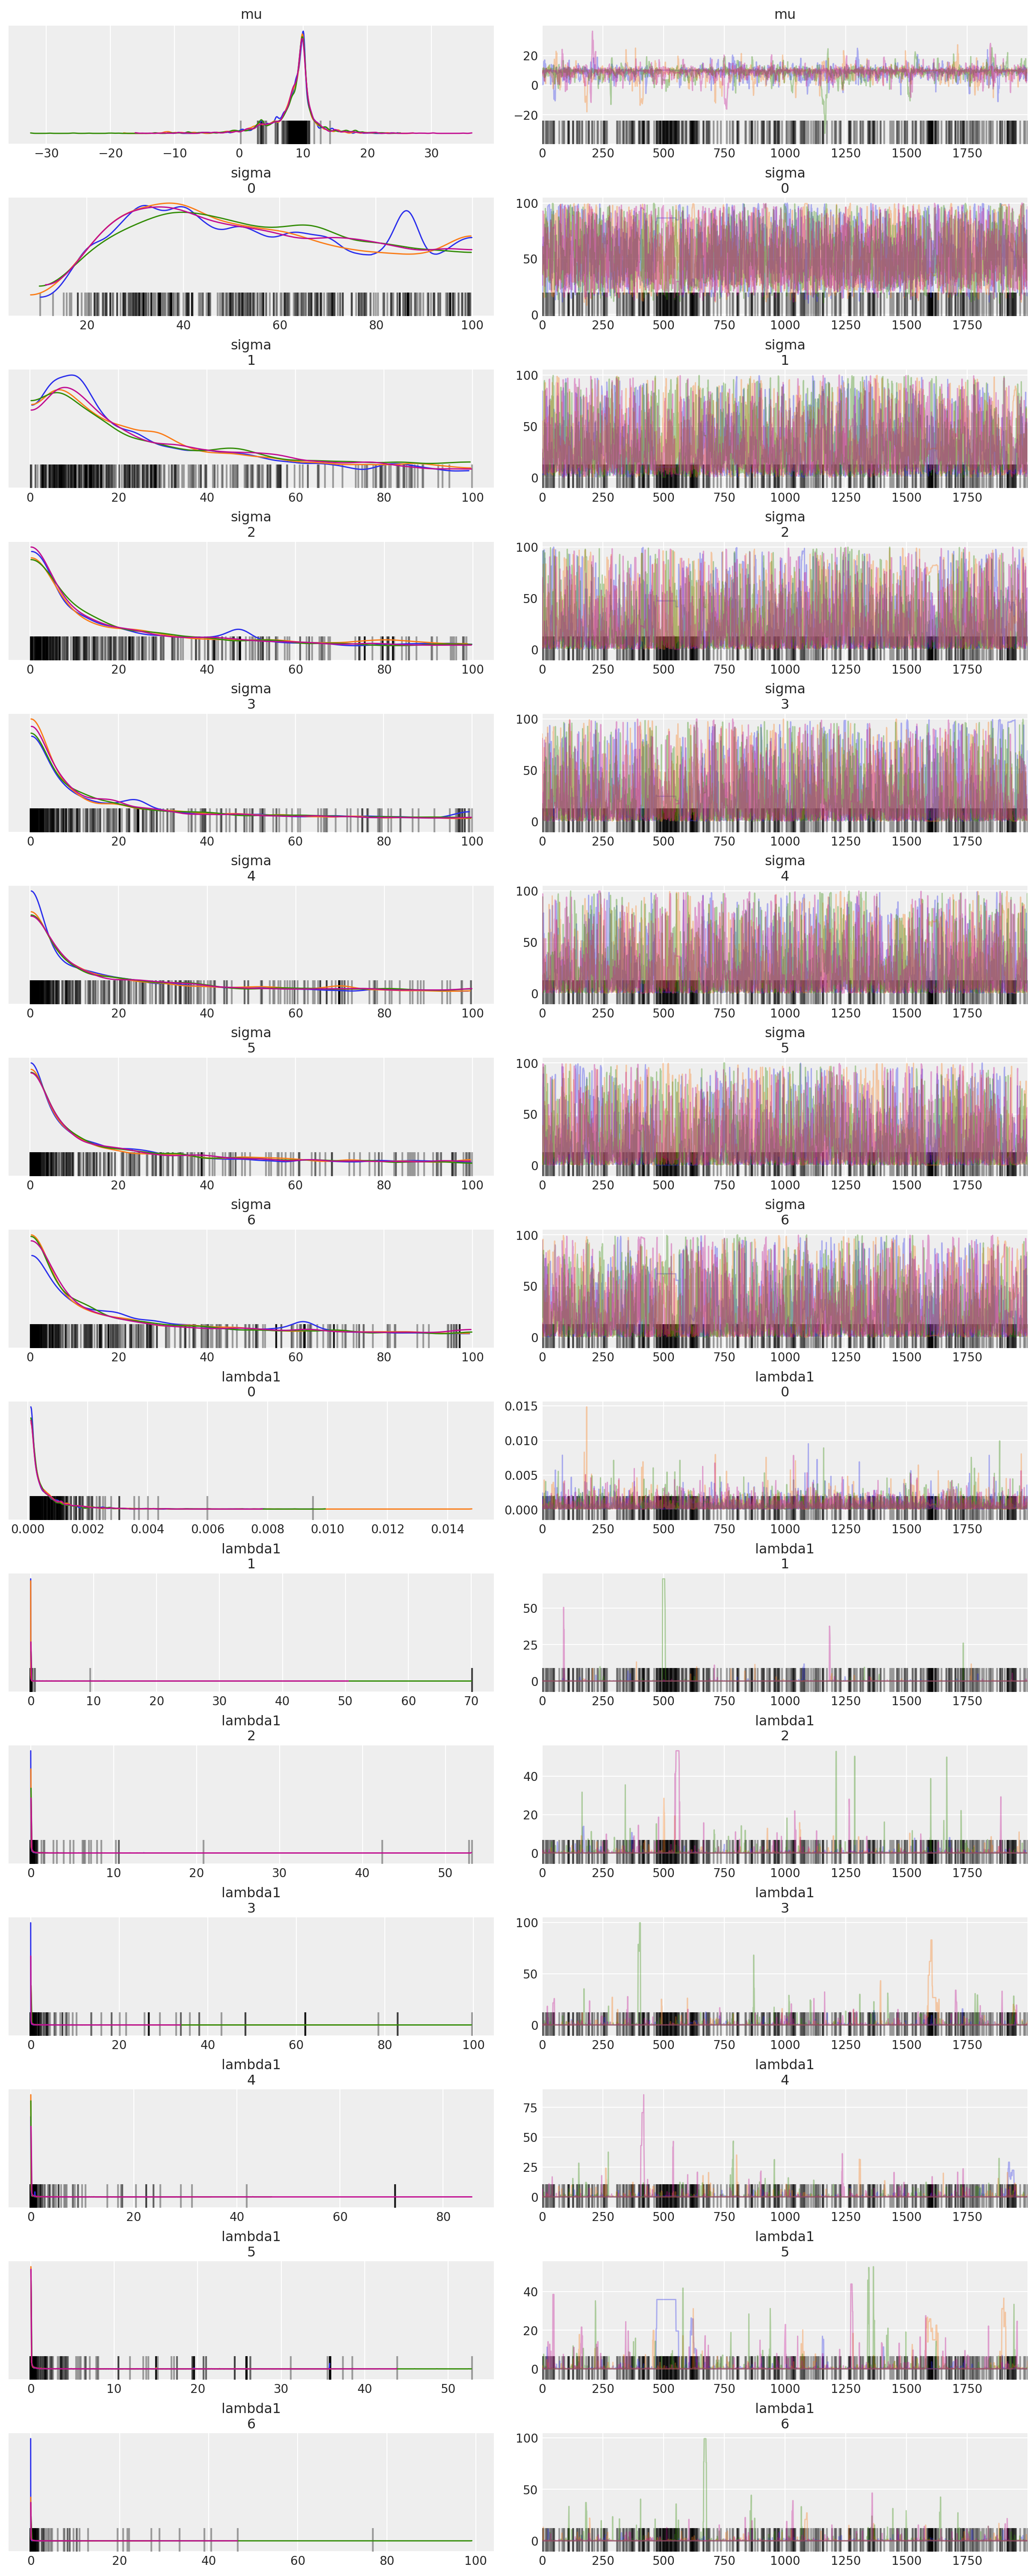

In [76]:
# data
x = np.array([-27.020, 3.570, 8.191, 9.898, 9.603, 9.945, 10.056])
n = len(x)

with pm.Model() as model2_2:
    # prior
    mu = pm.Normal("mu", mu=0., tau=0.001)
    sigma = pm.Uniform("sigma", lower=0., upper=100., shape=n)
    lambda1 = pm.Deterministic("lambda1", 1 / (sigma ** 2))
    # observed
    xi = pm.Normal("xi", mu=mu, tau=lambda1, observed=x)
    # inference
    trace2_2 = pm.sample(2000, tune=2000, target_accept=0.9)

display(az.summary(trace2_2, stat_funcs={"median": np.median}))

az.plot_trace(trace2_2, compact=False);

    the diﬀerence between the scientists is reduced. (So choosing an appropriate prior is important.)

## 4.3 Repeated measurement of IQ


The model:
$$ \mu_{i} \sim \text{Uniform}(0, 300)  $$
$$ \sigma \sim \text{Uniform} (0, 100)  $$
$$ x_{ij} \sim \text{Gaussian} (\mu_{i}, \frac{1}{\sigma^2})  $$

Data Come From Gaussians With Different Means But Common Precision

In [9]:
# Data
y = np.array([[90, 95, 100], [105, 110, 115], [150, 155, 160]])
ntest = 3
nsbj = 3

with pm.Model() as model3:
    # mu_i ~ Uniform(0, 300)
    # notices the shape here need to be properly
    # initualized to have the right repeated measure
    mui = pm.Uniform("mui", 0., 300., shape=(nsbj, 1))

    # sg ~ Uniform(0, 100)
    # sg = pm.Uniform('sg', .0, 100)

    # It is more stable to use a Gamma prior
    lambda1 = pm.Gamma("lambda1", alpha=0.01, beta=0.01)
    sg = pm.Deterministic("sg", 1 / np.sqrt(lambda1))

    # y ~ Normal(mu_i, sg)
    yd = pm.Normal("y", mu=mui, sd=sg, observed=y)

    trace3 = pm.sample(init="adapt_diag")

idata3 = az.from_pymc3(trace3)
az.summary(idata3)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lambda1, mui]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


mean     sd   hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  \
mui[0,0]   95.097  3.532   88.687  102.032      0.065    0.046    2959.0   
mui[1,0]  109.912  3.493  103.789  116.636      0.063    0.045    3042.0   
mui[2,0]  154.996  3.717  148.419  161.893      0.072    0.051    2639.0   
lambda1     0.041  0.023    0.004    0.083      0.001    0.000    1324.0   
sg          5.737  2.188    2.894    9.430      0.063    0.046    1219.0   

          ess_sd  ess_bulk  ess_tail  r_hat  
mui[0,0]  2923.0    3490.0    2549.0    1.0  
mui[1,0]  3042.0    3206.0    2041.0    1.0  
mui[2,0]  2639.0    3183.0    1822.0    1.0  
lambda1   1276.0    1314.0    1476.0    1.0  
sg        1112.0    1314.0    1476.0    1.0

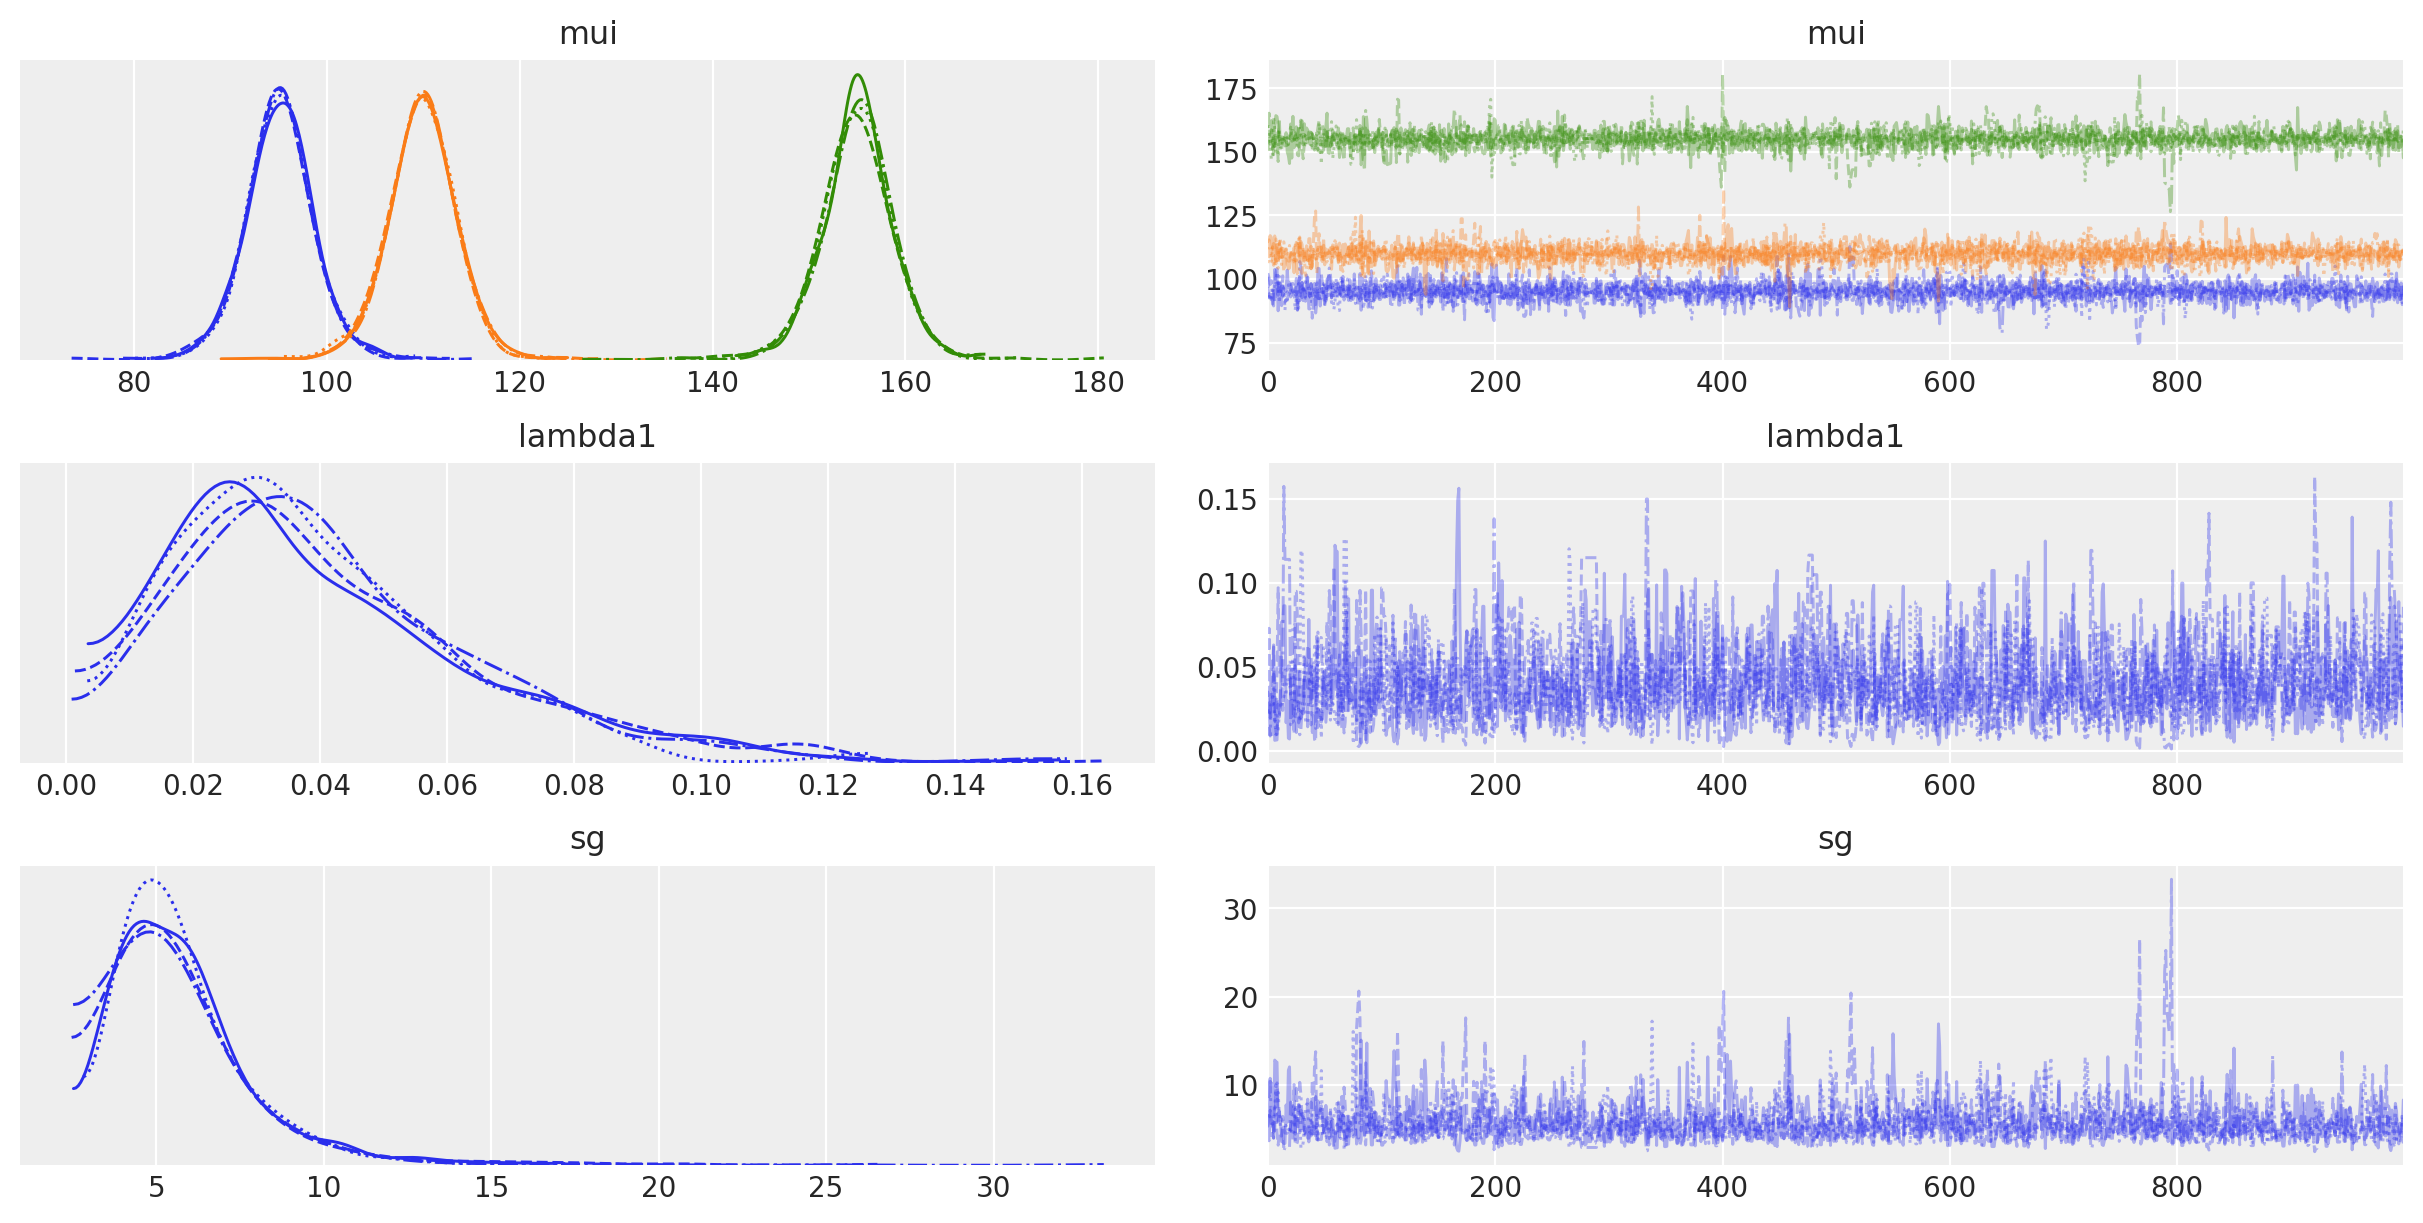

In [10]:
az.plot_trace(idata3, compact=True);

In [11]:
%load_ext watermark
%watermark -n -u -v -iv -w

arviz  0.7.0
pandas 1.0.3
pymc  3.8
numpy  1.18.1
last updated: Sat Apr 25 2020 

CPython 3.7.7
IPython 7.13.0
watermark 2.0.2
